In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('datasets.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20-12-2015,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01-05-2023,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18-12-2023,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17-09-2023,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03-12-2023,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


First I find out the names of the columns as it is a large data

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

Checking Missing Values

In [6]:
print(df.isnull().sum())

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64


To check the type of data in each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

Removing duplicates

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  float64
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20751 non-null  object 
 6   latitude                        20751 non-null  float64
 7   longitude                       20751 non-null  float64
 8   room_type                       20751 non-null  object 
 9   price                           20724 non-null  float64
 10  minimum_nights                  20751 non-null  float64
 11  number_of_reviews               20751 non-null  float64
 12  last_review                     20751

Descriptive Statistics

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20751.000000,20751.000000,20724.000000,20751.000000,20751.000000,20751.000000,20751.000000,20751.000000,20751.000000,20758.000000
mean,3.034029e+17,1.749316e+08,40.726802,-73.939155,187.732195,28.560359,42.617079,1.257817,18.847477,206.008674,10.851959,1.723721
std,3.901178e+17,1.725541e+08,0.060300,0.061410,1023.539393,33.541363,73.536140,1.904894,70.921782,135.085189,21.360081,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722830,-73.949584,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.144102e+08,40.763100,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


Visualization

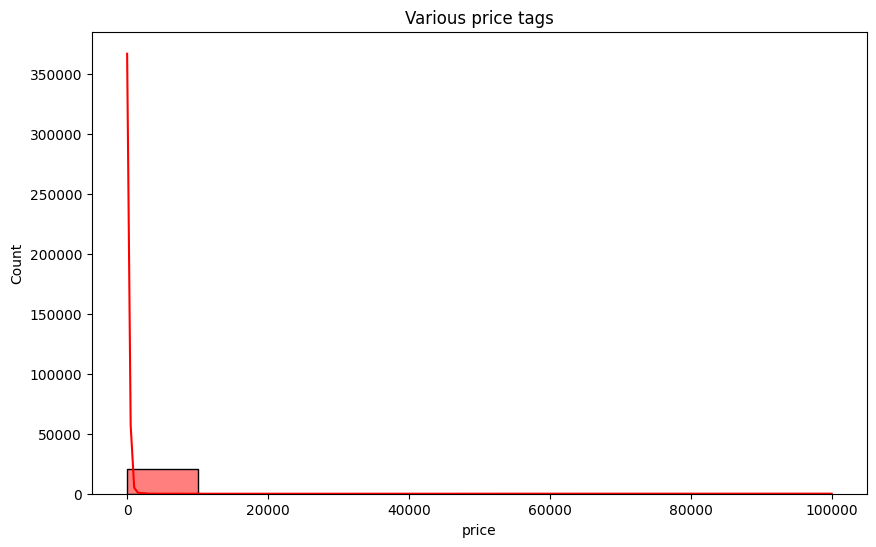

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10,kde=True, color= 'red')
plt.title('Various price tags')
plt.show()

In [16]:
df['room_type']

,room_type
0,Private room
1,Entire home/apt
2,Entire home/apt
3,Private room
4,Entire home/apt
...,...
20765,Private room
20766,Entire home/apt
20767,Entire home/apt
20768,Entire home/apt


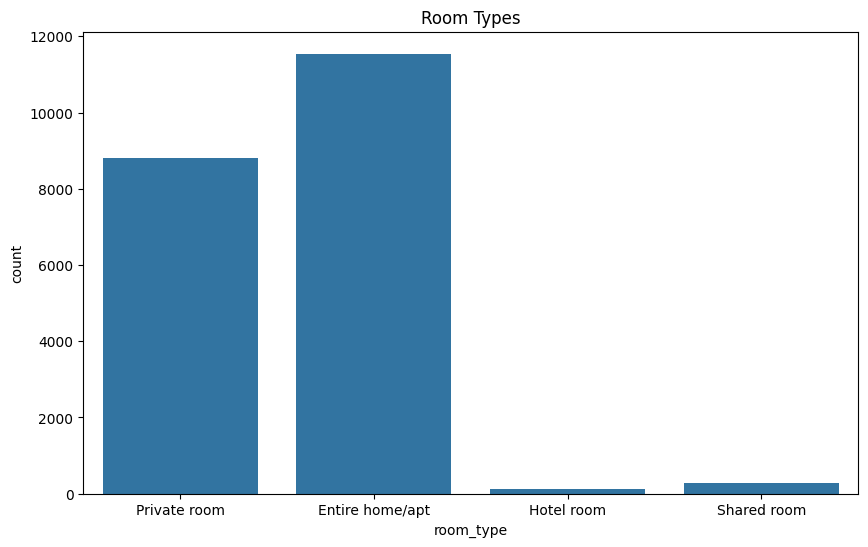

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df)
plt.title('Room Types')
plt.show()

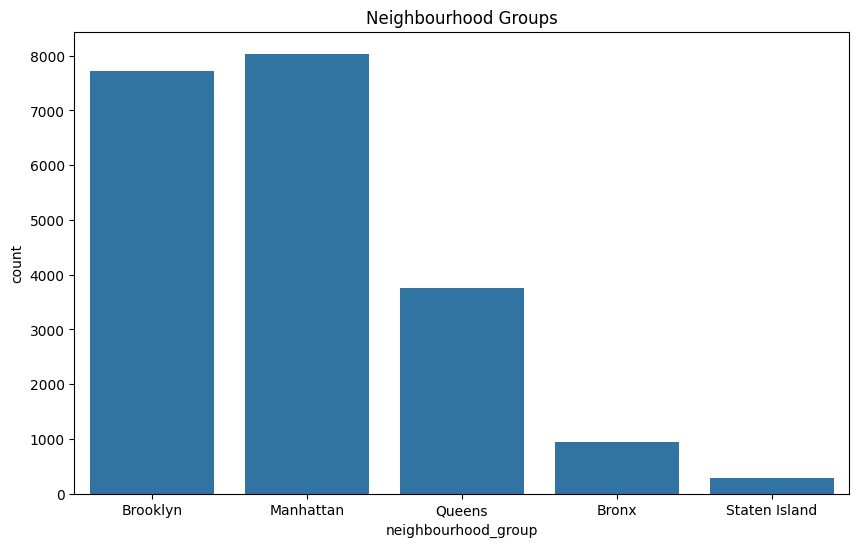

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Neighbourhood Groups')
plt.show()

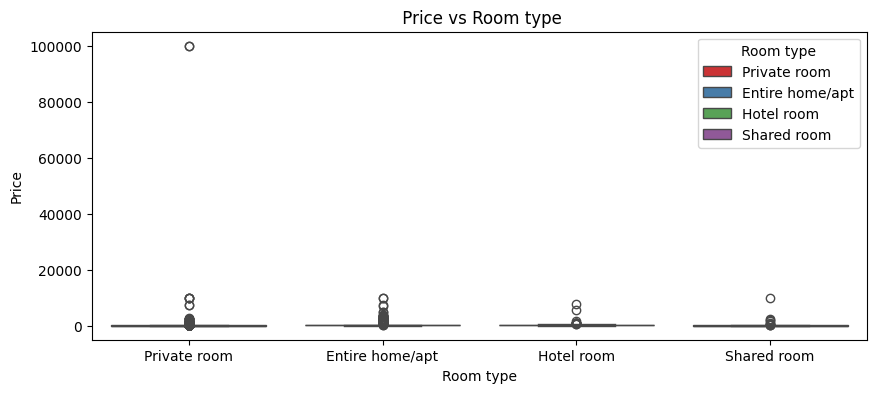

In [25]:
plt.figure(figsize=(10,4))
sns.boxplot(x='room_type', y='price', hue='room_type',data=df, palette='Set1')
plt.title(' Price vs Room type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.legend(title='Room type')
plt.show()

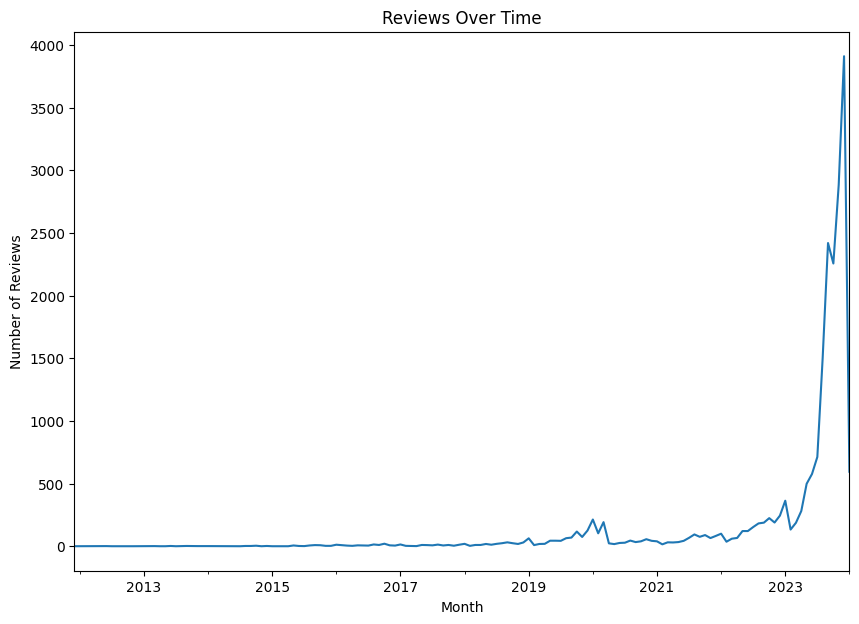

In [27]:
df['last_review'] = pd.to_datetime(df['last_review'])
reviews_over_time = df.groupby(df['last_review'].dt.to_period('M')).size()
plt.figure(figsize=(10, 7))
reviews_over_time.plot(kind='line')
plt.title('Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()